In [3]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical, plot_model
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import LSTM, Dense, Input
from keras.optimizers import SGD

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error


Using TensorFlow backend.


In [3]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

TypeError: 'MLPBlock' object is not callable

In [ ]:
def data_processing(lag_df):
    #Splitting training and test data
    df_train, df_test = train_test_split(lag_df, train_size=0.8, test_size=0.2, shuffle=False)
    x_train = df_train.loc[:,train_cols].values
    y_train = df_train.loc[:,label_cols].values
    x_test = df_test.loc[:,train_cols].values
    y_test = df_test.loc[:,label_cols].values
    
    #Min Max scalr normalizing
    xtrain_min_max_scaler = MinMaxScaler(feature_range = (0, 1))
    ytrain_min_max_scaler = MinMaxScaler(feature_range = (0, 1))
    xtest_min_max_scaler = MinMaxScaler(feature_range = (0, 1))
    ytest_min_max_scaler = MinMaxScaler(feature_range = (0, 1))
    
    #Normalizing training data
    x_train_nor = xtrain_min_max_scaler.fit_transform(x_train)
    y_train_nor = ytrain_min_max_scaler.fit_transform(y_train)

    # Normalizing test data
    x_test_nor = xtest_min_max_scaler.fit_transform(x_test)
    y_test_nor = ytest_min_max_scaler.fit_transform(y_test)
    
    # Saving actual train and test y_label
    y_train_actual = y_train
    y_test_actual = y_test
    
    #Building timeseries
    X_Train, Y_Train, Y_train_actual = timeseries(x_train_nor, y_train_nor, y_train_actual, time_steps=18, out_steps=1)
    X_Test, Y_Test, Y_test_actual = timeseries(x_test_nor, y_test_nor, y_test_actual, time_steps=18, out_steps=1)
    
    return X_Train, Y_Train, Y_train_actual, X_Test, Y_Test, Y_test_actual

In [1]:
for i in range(5):
    print(i)


0
1
2
3
4


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

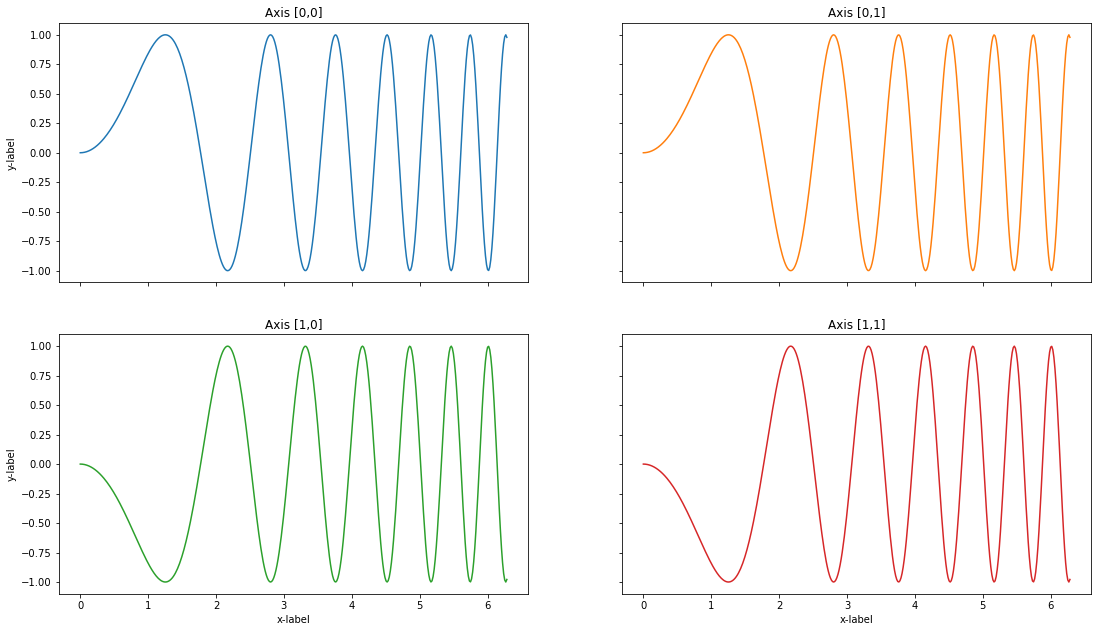

In [5]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [6]:
l = 3
for iteration in range(l):
    print(iteration)
    if ((iteration%l) == (l-1)):
        print(iteration)

0
1
2
2


In [7]:
import numpy as np
np.random.rand(3,2)

array([[0.67436137, 0.5742627 ],
       [0.4663803 , 0.71454509],
       [0.69008318, 0.42168121]])

In [8]:
#import modules
import numpy as np
import pandas as pd

In [9]:
#import data
df = pd.read_csv('Sub0-RAW.csv')
df.head()

,Dates,Year,Month,Day,Hours,Precipitation,Temperature,Outflow
0,10/1/1980,1980,10,1,0:00:00,0.0,102.992,5.0
1,10/1/1980,1980,10,1,1:00:00,0.0,97.790,5.0
2,10/1/1980,1980,10,1,2:00:00,0.0,92.588,5.0
3,10/1/1980,1980,10,1,3:00:00,0.0,87.404,5.0
4,10/1/1980,1980,10,1,4:00:00,0.0,85.172,5.0


In [10]:
train_cols = ["Precipitation","Temperature"]
label_cols = ["Outflow(t+1)"]

In [11]:
new_df = df.filter(["Precipitation","Temperature", "Outflow"], axis=1)

In [12]:
import numpy as np

In [13]:
print(np.mean([28.478918513520654,
 29.95051855996952,
 10.469175291812743,
 21.463157090409215,
 21.31904865856566,
 21.186642417288514,
 18.34689350988946,
 19.88841371849793,
 25.144055438341837,
 13.71382923839823,
 19.78093414994603,
 16.526378549402168,
 19.669486988752936,
 3.336608521938365,
 103.92954777095761,
 17.99761443782561,
 20.823864699434388,
 18.52017768815906,
 23.98778555640999,
 19.835103034570057]))

23.718407691704503


In [14]:
arr = [1,3,5,9,13,22,27,35,46,51,55,83,87,23]
n = 14

In [15]:
def insertionSort1(n, arr):
    last_num = arr[n-1]
    for i in range(n-2,-1, -1):
        if (arr[i] > last_num):
            arr[i+1] = arr[i]
        elif():
            arr[i+1] = last_num
            break       
        for j in range(n):
            print(arr[j], end=' ')
        print()
    for j in range(n):
            print(arr[j], end=' ')

In [16]:
insertionSort1(n,arr)

1 3 5 9 13 22 27 35 46 51 55 83 87 87 
1 3 5 9 13 22 27 35 46 51 55 83 83 87 
1 3 5 9 13 22 27 35 46 51 55 55 83 87 
1 3 5 9 13 22 27 35 46 51 51 55 83 87 
1 3 5 9 13 22 27 35 46 46 51 55 83 87 
1 3 5 9 13 22 27 35 35 46 51 55 83 87 
1 3 5 9 13 22 27 27 35 46 51 55 83 87 
1 3 5 9 13 22 27 27 35 46 51 55 83 87 
1 3 5 9 13 22 27 27 35 46 51 55 83 87 
1 3 5 9 13 22 27 27 35 46 51 55 83 87 
1 3 5 9 13 22 27 27 35 46 51 55 83 87 
1 3 5 9 13 22 27 27 35 46 51 55 83 87 
1 3 5 9 13 22 27 27 35 46 51 55 83 87 
1 3 5 9 13 22 27 27 35 46 51 55 83 87 

In [3]:
last_num = arr[n-1]
last_num

3

In [38]:
arr = [1,3,5,9,13,22,27,35,46,51,55,83,87,23]
n = 14

In [44]:
arr = [2,3,4,5,6,7,8,9,10,1]
n=10

In [45]:
def insertionSort1(n, arr):
    last_num = arr[n-1]
    i = n-2
    while(i>=0 and arr[i] > last_num):
        arr[i+1] = arr[i]
        for j in range(n):
            print(arr[j], end=' ')
        i -= 1
        print()
    arr[i+1] = last_num
    for j in range(n):
        print(arr[j], end=' ')

In [46]:
insertionSort1(n,arr)

2 3 4 5 6 7 8 9 10 10 
2 3 4 5 6 7 8 9 9 10 
2 3 4 5 6 7 8 8 9 10 
2 3 4 5 6 7 7 8 9 10 
2 3 4 5 6 6 7 8 9 10 
2 3 4 5 5 6 7 8 9 10 
2 3 4 4 5 6 7 8 9 10 
2 3 3 4 5 6 7 8 9 10 
2 2 3 4 5 6 7 8 9 10 
1 2 3 4 5 6 7 8 9 10 

In [ ]:
def insertionSort2(n, arr):
    l = len(arr)
    for j in range(1,l):
        i = j-1
        key = arr[j]
        while i>=0 and key<arr[i]:
            arr[i+1] = arr[i]
            #for item in arr:
            #   print(item, end=' ')
            #print()
            i -= 1
        arr[i+1] = key
        for item in arr:
            print(item, end=' ')
        print()

In [1]:
def rotLeft(a, d):
    temp_arr = a
    l = len(a)
    for i in range(d):
        for j in range(l):
            if (j == 0):
                frst_item = temp_arr[j]
            elif ( j == l-1):
                temp_arr[j-1] = temp_arr[j]
                temp_arr[j] = frst_item        
            else:                
                temp_arr[j-1] = temp_arr[j]
                temp_arr[j] = temp_arr[j+1]
                
    return temp_arr

In [2]:
a = [1,2,3,4,5]
d = 4
rotLeft(a,d)

[5, 1, 2, 3, 4]

In [16]:
def rotLeft(a, d):    
    l = len(a)
    temp_arr = [0]*l
    for i in range(l):
        new_index = (i + l - d) % l
        temp_arr[new_index] = a[i]
    print(temp_arr)
    return temp_arr

In [17]:
a = [1,2,3,4,5]
d = 4
rotLeft(a,d)

[5, 1, 2, 3, 4]


[5, 1, 2, 3, 4]

In [10]:
a

[1, 1, 1, 1, 1]

In [11]:
temp_arr

NameError: name 'temp_arr' is not defined

In [18]:
a = [2,1,3,4,5]
for i,p in enumerate(a):
    print(i, p)

0 2
1 1
2 3
3 4
4 5


In [1]:
b = []
for i in range(0, 50):
    b.append(i)

In [5]:
total = []
for i in range(0, 50, 5):
    total.append(sum(b[i:i+5]))

In [6]:
total

[10, 35, 60, 85, 110, 135, 160, 185, 210, 235]

In [ ]:
10,11,12,13,14

In [1]:
from collections import defaultdict
d = defaultdict(int) ## inside parenthesis we say what should be the default value.
d['Apple']=50
d['Orange']=20
print(d['Apple'])
print(d['Grapes']) ##→ This gives Will not give error

50
0


In [2]:
d = {}

In [5]:
d['Apple']=[50, 20]
d['Orange']=20

In [4]:
print(d['Apple'])
print(d['Grapes'])

50


KeyError: 'Grapes'

In [6]:
d['Apple'].append(2)

In [7]:
d['Apple']

[50, 20, 2]

In [8]:
box = {(1,1): [2]}

In [9]:
box[(1,1)].append(4)

In [10]:
box[(1,1)]

[2, 4]

In [11]:
forRow = {1:[4,5,6]}

In [12]:
forRow[1]

[4, 5, 6]

In [33]:
def howSum(target, numbers, memo = {}):
    print(memo)
    if target in memo:
        return memo[target]
    if target == 0:
        return []
    if target < 0:
        return None
    for num in numbers:
        rem = target - num
        remRes = howSum(rem, numbers, memo)
        if(remRes is not None):
            memo[target] = [*remRes, num]
            return memo[target]
    memo[target] = None
    return None
        

In [34]:
howSum(7, [2,3,5, 7])

{}
{}
{}
{}
{}
{}
{}
{}
{1: None}


[3, 2, 2]